In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples, accuracy_score, classification_report

from pyod.models.ecod import ECOD
from yellowbrick.cluster import KElbowVisualizer

In [2]:
import prince
import plotly.express as px


def get_pca_2d(embeddings, predict):

    df = pd.DataFrame(embeddings)

    pca_2d_object = prince.PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
    )

    pca_2d_object.fit(df)

    df_pca_2d = pca_2d_object.transform(df)
    df_pca_2d.columns = ["comp1", "comp2"]
    df_pca_2d["cluster"] = predict

    return pca_2d_object, df_pca_2d



def get_pca_3d(embeddings, predict):

    df = pd.DataFrame(embeddings)

    pca_3d_object = prince.PCA(
        n_components=3,
        n_iter=3,
        rescale_with_mean=True,
        rescale_with_std=True,
        copy=True,
        check_input=True,
        engine='sklearn',
        random_state=42
    )

    pca_3d_object.fit(df)

    df_pca_3d = pca_3d_object.transform(df)
    df_pca_3d.columns = ["comp1", "comp2", "comp3"]
    df_pca_3d["cluster"] = predict

    return pca_3d_object, df_pca_3d



def plot_pca_3d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    fig = px.scatter_3d(
          df, 
          x='comp1', 
          y='comp2', 
          z='comp3',
          color='cluster',
          template="plotly",
          
          # symbol = "cluster",
          
          color_discrete_sequence=px.colors.qualitative.Vivid,
          title=title).update_traces(
              # mode = 'markers',
              marker={
                  "size": 4,
                  "opacity": opacity,
                  # "symbol" : "diamond",
                  "line": {
                      "width": width_line,
                      "color": "black",
                  }
              }
          ).update_layout(
                  width = 800, 
                  height = 800, 
                  autosize = True, 
                  showlegend = True,
                  legend=dict(title_font_family="Times New Roman",
                              font=dict(size= 20)),
                  scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                              yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                              zaxis=dict(title = 'comp3', titlefont_color = 'black')),
                  font = dict(family = "Gilroy", color  = 'black', size = 15))
        
    
    fig.show()

def plot_pca_2d(df, title = "PCA Space", opacity=0.8, width_line = 0.1):

    df = df.astype({"cluster": "object"})
    df = df.sort_values("cluster")

    fig = px.scatter(df, 
                        x='comp1', 
                        y='comp2', 
                        color='cluster',
                        template="plotly",
                        # symbol = "cluster",
                        
                        color_discrete_sequence=px.colors.qualitative.Vivid,
                        title=title).update_traces(
                            # mode = 'markers',
                            marker={
                                "size": 8,
                                "opacity": opacity,
                                # "symbol" : "diamond",
                                "line": {
                                    "width": width_line,
                                    "color": "black",
                                }
                            }
                        ).update_layout(
                                width = 800, 
                                height = 700, 
                                autosize = False, 
                                showlegend = True,
                                legend=dict(title_font_family="Times New Roman",
                                            font=dict(size= 20)),
                                scene = dict(xaxis=dict(title = 'comp1', titlefont_color = 'black'),
                                            yaxis=dict(title = 'comp2', titlefont_color = 'black'),
                                            ),
                                font = dict(family = "Gilroy", color  = 'black', size = 15))
                        
        
    fig.show()


In [3]:
df = pd.read_csv('./data/processed/maleficent.csv')
df.head()

,category,text,embedding
0,conversation,"hi, how are you doing?","[0.6487895846366882, -0.17706210911273956, 0.2..."
1,conversation,hello! i am wonderful and yourself?,"[0.22256237268447876, 0.2662394344806671, 0.43..."
2,conversation,i am doing well. what are you up to?,"[0.5954824090003967, -0.23374763131141663, 0.1..."
3,conversation,just got in from my garden. i was seeing if my...,"[0.19071455299854279, -0.10506685078144073, -0..."
4,conversation,i am having dinner at my apartment with my 3 s...,"[0.5913735032081604, -0.2548123300075531, 0.14..."


In [52]:
n_clusters = 5
embeddings = []
for embedding in df['embedding']:
    temp = [float(x.strip(' []')) for x in embedding.split(',')]
    embeddings.append(temp)
print((embeddings[0]))

clusters = KMeans(n_clusters=n_clusters, init = "k-means++").fit(embeddings)
print(clusters.inertia_)
clusters_predict = clusters.predict(embeddings)

[0.6487895846366882, -0.17706210911273956, 0.26846253871917725, 0.18905383348464966, -0.33726221323013306, -0.3302522301673889, 0.19196242094039917, 0.31563907861709595, -0.29508668184280396, 0.09558296203613281, 0.08327564597129822, -0.30192962288856506, -0.1834355741739273, -0.030582385137677193, 0.08354801684617996, 0.025754356756806374, -0.09357529878616333, -0.4416128396987915, -0.6328431963920593, -0.12889698147773743, -0.6578927636146545, -0.11932878941297531, -0.3738086521625519, -0.0864822268486023, 0.4625754952430725, 0.1258043497800827, 0.009837444871664047, 0.32809606194496155, -0.3845890462398529, -0.350810706615448, -0.0006223793025128543, -0.13784588873386383, 0.32487356662750244, 0.07625002413988113, 0.005976521410048008, 0.5497534871101379, 0.039890170097351074, -0.23408359289169312, -0.0031182989478111267, 0.02026244066655636, 0.08132883906364441, -0.26453620195388794, 0.1429012417793274, 0.1672365665435791, 0.24232707917690277, -0.17889976501464844, -0.07034225761890

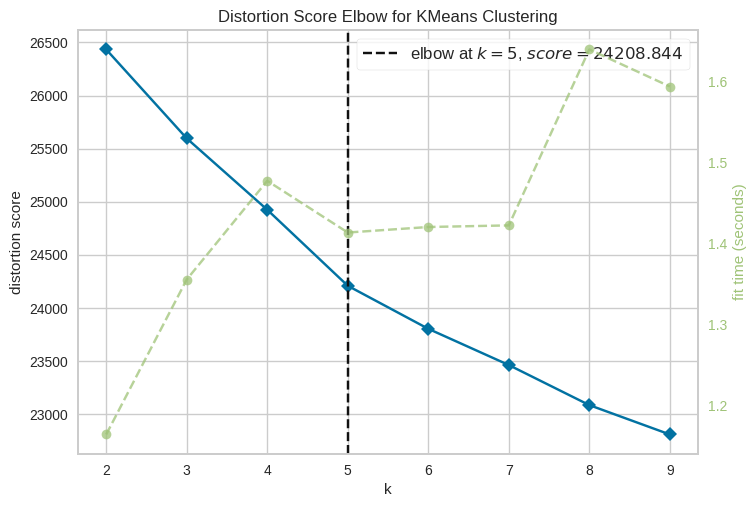

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
km = KMeans(init="k-means++", random_state=0)
visualizer = KElbowVisualizer(km, k=(2,10))

visualizer.fit(np.array(embeddings))
visualizer.show()

In [55]:
pca_3d_object, df_pca_3d = get_pca_3d(embeddings, clusters_predict)

In [56]:
plot_pca_3d(df_pca_3d, title = "PCA Space", opacity=0.5, width_line = 0.1)

In [53]:
pca_2d_object, df_pca_2d = get_pca_2d(embeddings, clusters_predict)

In [54]:
plot_pca_2d(df_pca_2d, title = "PCA Space", opacity=0.5, width_line = 0.1)

In [57]:
sampling_data = pd.DataFrame(embeddings).sample(frac=0.5, replace=True, random_state=1)
sampling_clusters = pd.DataFrame(clusters_predict).sample(frac=0.5, replace=True, random_state=1)[0].values

df_tsne_3d = TSNE(
                  n_components=3, 
                  learning_rate=500, 
                  init='random', 
                  perplexity=200, 
                  n_iter = 5000).fit_transform(sampling_data)

df_tsne_3d = pd.DataFrame(df_tsne_3d, columns=["comp1", "comp2",'comp3'])
df_tsne_3d["cluster"] = sampling_clusters


In [59]:
plot_pca_3d(df_tsne_3d, title = "T-SNE Space", opacity=0.5, width_line = 0.1)


In [58]:
df_tsne_2d = TSNE(
    n_components=2,
    learning_rate=500,
    init='random',
    perplexity=200,
    n_iter = 5000).fit_transform(sampling_data)

df_tsne_2d = pd.DataFrame(df_tsne_2d, columns=["comp1", "comp2"])
df_tsne_2d["cluster"] = sampling_clusters
plot_pca_2d(df_tsne_2d, title = "T-SNE Space", opacity=0.5, width_line = 0.1)